<a href="https://colab.research.google.com/github/JavierMedel/Data-Structures-and-Algorithms/blob/master/Transfer_Learning_Baler_Model_Classification_TF_2_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG16

In [0]:
import tensorflow as tf

In [0]:
IMG_SHAPE = (224, 224, 3)

In [0]:
base_model_VGG = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                             include_top = False,
                                             weights = 'imagenet')

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
base_model_VGG.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
base_model_VGG.trainable = False

In [0]:
base_model_VGG.output

<tf.Tensor 'block5_pool/Identity:0' shape=(None, 7, 7, 512) dtype=float32>

In [0]:
global_average_layer_VGG = tf.keras.layers.GlobalAveragePooling2D()(base_model_VGG.output) # se le aplica a la capa inmediata anterior

In [0]:
global_average_layer_VGG

<tf.Tensor 'global_average_pooling2d/Identity:0' shape=(None, 512) dtype=float32>

In [0]:
prediction_layer_VGG = tf.keras.layers.Dense(units      = 3,
                                         activation = 'softmax')(global_average_layer_VGG) # se le aplica a la capa inmediata anterior

In [0]:
model_VGG = tf.keras.models.Model(inputs  = base_model_VGG.input, 
                                  outputs = prediction_layer_VGG)

In [0]:
model_VGG.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
'''model_VGG = tf.keras.Sequential([base_model_VGG,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(3, activation='softmax')])'''

"model_VGG = tf.keras.Sequential([base_model_VGG,\n                                 tf.keras.layers.GlobalAveragePooling2D(),\n                                 tf.keras.layers.Dense(3, activation='softmax')])"

In [0]:
model_VGG.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
from tensorflow.keras.optimizers import RMSprop

                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

# MobilNetV2

In [0]:
import tensorflow as tf

In [0]:
IMG_SHAPE = (224, 224, 3)

In [3]:
base_model = tf.keras.applications.MobileNetV2(input_shape  = IMG_SHAPE, 
                                               include_top  = False, 
                                               weights      = "imagenet")

9412608/9406464 [==============================] - 0s 0us/step


In [4]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
base_model.trainable = False
#base_model.trainable = True

In [6]:
print("Number of layers in the base model: {}".format(len(base_model.layers)))

Number of layers in the base model: 155


In [0]:
fine_tune_at = 10

In [0]:
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [7]:
base_model.output

<tf.Tensor 'out_relu/Identity:0' shape=(None, 7, 7, 1280) dtype=float32>

In [0]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output) # se le aplica a la capa inmediata anterior

In [9]:
global_average_layer

<tf.Tensor 'global_average_pooling2d/Identity:0' shape=(None, 1280) dtype=float32>

In [0]:
prediction_layer = tf.keras.layers.Dense(units      = 3,
                                         activation = 'softmax')(global_average_layer) # se le aplica a la capa inmediata anterior

In [0]:
model = tf.keras.models.Model(inputs  = base_model.input, 
                              outputs = prediction_layer)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

## Dataset

In [15]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/My Drive/Colab Notebooks/Dataset_Image_Classification_Baler.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [0]:
import os

train_data_dir = '/tmp/Dataset_Image_Classification_Baler'

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 20
classes = ['BALED CARDBOARD', 'BALED FILM', 'BALED EMPTY']

# ---------------------
# Create a ImageDataGenerator to rescaled image by 1./255 and apply some argumentation methods
# ---------------------
train_datagen = ImageDataGenerator(rescale          = 1.0/255., 
                                   shear_range      = 0.2,
                                   zoom_range       = 0.2,
                                   rotation_range   = 0.2,    
                                   validation_split = 0.3) # set validation split

# ---------------------
# Flow training images in batches of 20 using train_datagen generator
# ---------------------
train_generator = train_datagen.flow_from_directory(directory   = train_data_dir,
                                                    batch_size  = batch_size,
                                                    class_mode  = "categorical",
                                                    target_size = (224, 224),
                                                    subset      = "training",
                                                    classes     = classes)     
# ---------------------
# Flow validation images in batches of 20 using test_datagen generator
# ---------------------
validation_generator =  train_datagen.flow_from_directory(directory   = train_data_dir,
                                                         batch_size   = batch_size,
                                                         class_mode   = "categorical",
                                                         target_size  = (224, 224),
                                                         subset       = "validation",
                                                         classes      = classes)

Found 12668 images belonging to 3 classes.
Found 5428 images belonging to 3 classes.


In [20]:
print(train_generator.classes[-5000])
print(train_generator.filenames[-5000])

1
BALED FILM/c2c6fffa-c418-417b-ab4c-e63d72814639.jpg


## Train the Model

In [0]:
history = model.fit(train_generator,
                    steps_per_epoch   = train_generator.samples // batch_size,
                    validation_data   = validation_generator,
                    validation_steps  = validation_generator.samples // batch_size,
                    epochs            = 4)

Epoch 1/4
633/633 [==============================] - ETA: 0s - loss: 0.2154 - accuracy: 0.9228

In [0]:
# --------------------
# Save full model
# --------------------
model.save('classification-model_VGG_transfer_learning.h5')

In [0]:
valid_loss, valid_accuracy = model.evaluate(validation_generator)

272/272 [==============================] - 2801s 10s/step - loss: 0.5424 - accuracy: 0.8309


In [0]:
print("Accuracy after transfer learning: {0:.6f}".format(valid_accuracy))
print("Loss after transfer learning:     {0:.6f}".format(valid_loss))

Accuracy after transfer learning: 0.830877
Loss after transfer learning:     0.542413


###Running the Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a dog or a cat.

In [0]:
'''path = '/content/00b674a2-b02c-4858-addc-a1c51e1d34d9.jpg'
img  = image.load_img(path, target_size = (224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

prob = model.predict(images)
prob'''

"path = '/content/00b674a2-b02c-4858-addc-a1c51e1d34d9.jpg'\nimg  = image.load_img(path, target_size = (224, 224))\n\nx = image.img_to_array(img)\nx = np.expand_dims(x, axis=0)\nimages = np.vstack([x])\n\nprob = model.predict(images)\nprob"

In [0]:
####################
# Precit images
#####################

import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img  = image.load_img(path, target_size = (224, 224))
  
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes_prob = model_VGG.predict(images)
  print('classes      : ' , classes)
  print('classes_prob : ' , classes_prob[0])
  print('classes_idx  : ' , np.argmax(classes_prob))
# print(classes[np.argmax(classes_prob)])

Saving 00e9b839-4c9d-4288-8e06-f9a3e33d170a.jpg to 00e9b839-4c9d-4288-8e06-f9a3e33d170a (1).jpg
Saving 00edf3ef-780a-4d2d-bedd-6eea34cb68e9 - Copy.jpg to 00edf3ef-780a-4d2d-bedd-6eea34cb68e9 - Copy (1).jpg
Saving 00edf3ef-780a-4d2d-bedd-6eea34cb68e9.jpg to 00edf3ef-780a-4d2d-bedd-6eea34cb68e9 (2).jpg
Saving 0a00b31f-80e6-46fd-af74-71271ebbd369.jpg to 0a00b31f-80e6-46fd-af74-71271ebbd369.jpg
Saving 0a0c23d1-180a-4d7f-9f42-47bb8c75d606.jpg to 0a0c23d1-180a-4d7f-9f42-47bb8c75d606.jpg
classes      :  ['BALED CARDBOARD', 'BALED FILM', 'BALED EMPTY']
classes_prob :  [1.000000e+00 0.000000e+00 2.355397e-36]
classes_idx  :  0
classes      :  ['BALED CARDBOARD', 'BALED FILM', 'BALED EMPTY']
classes_prob :  [5.2846760e-02 2.1159203e-36 9.4715327e-01]
classes_idx  :  2
classes      :  ['BALED CARDBOARD', 'BALED FILM', 'BALED EMPTY']
classes_prob :  [5.2846760e-02 2.1159203e-36 9.4715327e-01]
classes_idx  :  2
classes      :  ['BALED CARDBOARD', 'BALED FILM', 'BALED EMPTY']
classes_prob :  [0.0014

### Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random cat or dog image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

In [0]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

As you can see we go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.


These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline.

### Evaluating Accuracy and Loss for the Model

Let's plot the training/validation accuracy and loss as collected during training:

Text(0.5, 1.0, 'Training and validation loss')

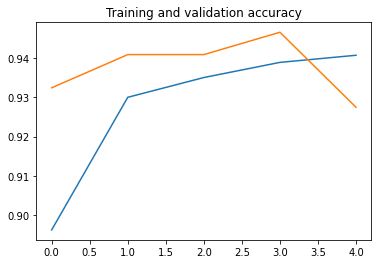

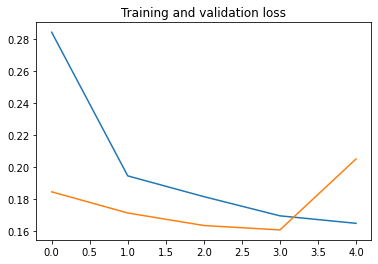

In [0]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

As you can see, we are **overfitting** like it's getting out of fashion. Our training accuracy (in blue) gets close to 100% (!) while our validation accuracy (in green) stalls as 70%. Our validation loss reaches its minimum after only five epochs.

Since we have a relatively small number of training examples (2000), overfitting should be our number one concern. Overfitting happens when a model exposed to too few examples learns patterns that do not generalize to new data, i.e. when the model starts using irrelevant features for making predictions. For instance, if you, as a human, only see three images of people who are lumberjacks, and three images of people who are sailors, and among them the only person wearing a cap is a lumberjack, you might start thinking that wearing a cap is a sign of being a lumberjack as opposed to a sailor. You would then make a pretty lousy lumberjack/sailor classifier.

Overfitting is the central problem in machine learning: given that we are fitting the parameters of our model to a given dataset, how can we make sure that the representations learned by the model will be applicable to data never seen before? How do we avoid learning things that are specific to the training data?

In the next exercise, we'll look at ways to prevent overfitting in the cat vs. dog classification model.

In [0]:
from sklearn.metrics import classification_report
print(classification_report())

TypeError: ignored

## Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [0]:
import os, signal

os.kill(     os.getpid() , 
         signal.SIGKILL
       )